In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


## อ่านรูปภาพจากไดเรกทรอรี่

In [0]:
!ls '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image'

dog-01.jpg	license-plate.jpg  Messi-02.jpg  Messi-04.jpg
image-room.jpg	Messi-01.jpg	   Messi-03.jpg


In [0]:
import glob

path = '/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image/'
pattern_search = 'M*.[jp]*[g]'

files = [f for f in glob.glob(path + pattern_search, recursive=True)]

for f in files:
    print(f)


/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image/Messi-01.jpg
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image/Messi-02.jpg
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image/Messi-04.jpg
/gdrive/My Drive/Colab Notebooks/1-2562-DIP/test-image/Messi-03.jpg


## แสดงรูปภาพจากไดเรกทรอรี่

In [0]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

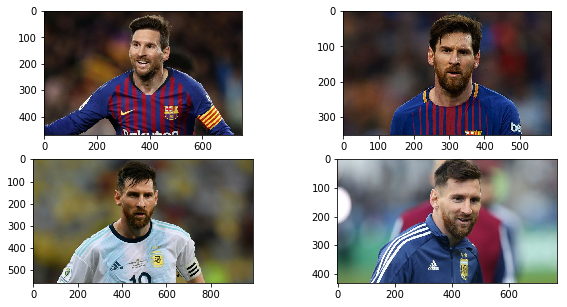

In [0]:
plt.figure(figsize = (10,5))

for i in range(0, len(files)):
  image = cv.imread(files[i], 1)
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  image = np.array(image)
  plt.subplot(2, 2, i+1)
  #plt.axis('off')
  plt.imshow(image)
plt.show()  

## Haar-Cascade Classifier เพื่อค้นหาใบหน้า สำหรับนำมาใช้เป็น Template

In [0]:
! wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2019-08-20 06:08:05--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.07s   

2019-08-20 06:08:05 (11.9 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [0]:
import matplotlib.pyplot as plt
import cv2 as cv

# Haar cascade classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

In [0]:
def face_detection_haarcascade(gray, img):
  
  # ค้นหาใบหน้า ต้องใช้รูปภาพสีเทาในการหา
  gray = np.array(gray, dtype='uint8')
  faces = face_cascade.detectMultiScale(gray, 1.3, 5, 0)
  print('Detected Face:', len(faces))

  # วาดกรอบสี่เหลี่ยมรอบใบหน้า
  for (x,y,w,h) in faces:
    print("face location and size", x,y,w,h)
    
    crop_img = img[y:y+h, x:x+w]
    plt.title('Croped face')
    plt.imshow(crop_img)
    plt.show()

### ผลลัพธ์จากการค้นหาใบหน้า

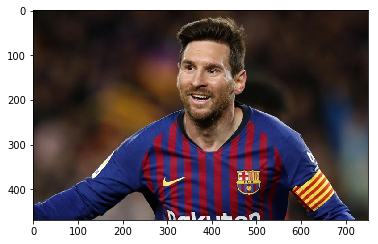

Detected Face: 1
face location and size 297 70 155 155


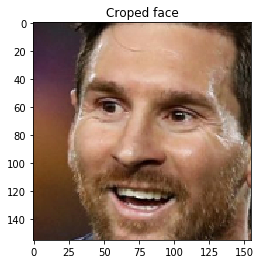

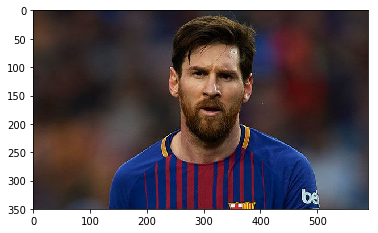

Detected Face: 1
face location and size 243 59 144 144


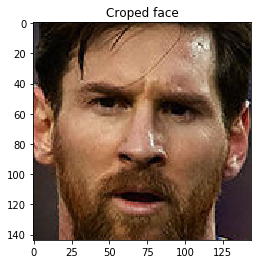

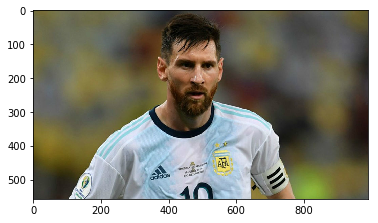

Detected Face: 1
face location and size 385 88 196 196


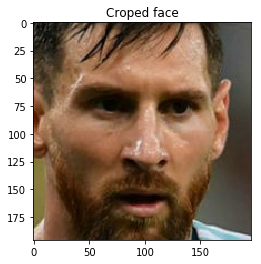

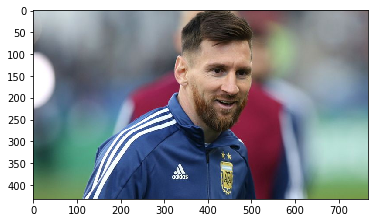

Detected Face: 1
face location and size 364 75 177 177


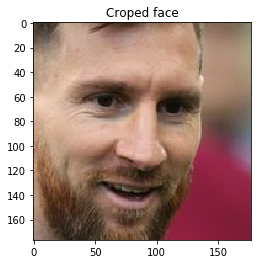

In [0]:
for i in range(0, len(files)):
  image = cv.imread(files[i], 1)
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  image = np.array(image)
  
  gray = cv.imread(files[i], 0)
  plt.imshow(image)
  plt.show() 
  
  face_detection_haarcascade(gray, image)  

ตัวอย่างการแปลงรูปภาพให้เป็นภาพสีเทา

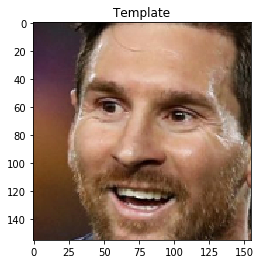

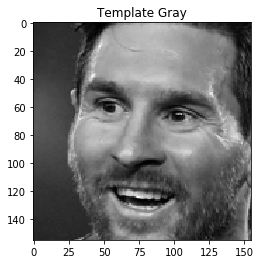

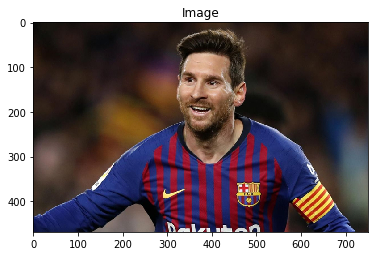

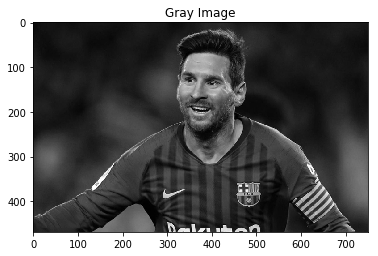

In [0]:
image = cv.imread(files[0], 1)

# template image
x,y,w,h = 297, 70, 155, 155
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = np.array(image)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

template_face = image[y:y+h, x:x+w]
template_face_gray = gray_image[y:y+h, x:x+w]

plt.title('Template')
plt.imshow(template_face)
plt.show()

plt.gray()
plt.title('Template Gray')
plt.imshow(template_face_gray)
plt.show()

plt.title('Image')
plt.imshow(image)
plt.show()

plt.gray()
plt.title('Gray Image')
plt.imshow(gray_image)
plt.show()

## Template Matching

(155, 155)
(297, 70) -- (452, 225)


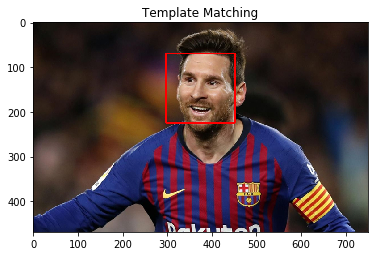

In [0]:
print(template_face_gray.shape[::-1])

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

res = cv.matchTemplate(image, template_face, eval(methods[0]))
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

print(top_left,'--', bottom_right)

copy_image = image.copy()
cv.rectangle(copy_image, top_left, bottom_right, 255, 2)
plt.title('Template Matching')
plt.imshow(copy_image)
plt.show()

### ฟังก์ชันที่ใช้ในโปรแกรม Template Matching

In [0]:
# อ่านและ return รูปภาพเป็นภาพสี หรือเทา
def return_image(file_loc, color_img=True):
  
  image = cv.imread(file_loc, 1)
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  image = np.array(image)
  
  if(color_img == False):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  
  return image
    
  
# ค้นหาใบหน้า และคืนค่าตำแหน่งของใบหน้า (x,y,w,y)
def face_detection_haarcascade(gray):
  
  # ค้นหาใบหน้า ต้องใช้รูปภาพสีเทาในการหา
  gray = np.array(gray, dtype='uint8')
  faces = face_cascade.detectMultiScale(gray, 1.3, 5, 0)
  print('Detected Face:', len(faces))

  # วาดกรอบสี่เหลี่ยมรอบใบหน้า
  for (x,y,w,h) in faces:
    print("face location and size", x,y,w,h)
    
  return x,y,w,h


# ฟังก์ชันสำหรับจับคู่ใบหน้า
def face_template_matching(image, template_face):
  
  methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
  w = template_face.shape[0]
  h = template_face.shape[1]
  
  res = cv.matchTemplate(image, template_face, eval(methods[0]))
  min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
  top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)
  
  copy_image = image.copy()
  cv.rectangle(copy_image, top_left, bottom_right, 255, 2)
  
  return copy_image

ตัวอย่างการค้นหาใบหน้า และนำมาเป็น template

### ค้นหาใบหน้า

Detected Face: 1
face location and size 247 62 138 138


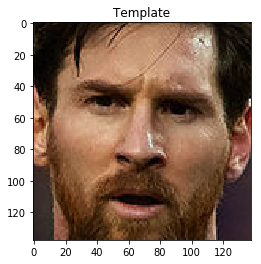

In [0]:
idx = 1
gray_img = return_image(files[idx], color_img=False)  
x,y,w,h = face_detection_haarcascade(gray_img)

#แสดงรูป Template
img = return_image(files[idx], color_img=True)
template_img = img[y:y+h, x:x+w]

plt.title('Template')
plt.imshow(template_img)
plt.show()

### นำใบหน้าที่ค้นพบ ไปทำการเปรียบเทียบ (Matching) กับรูปภาพที่อยู่ในไดเรกทรอรี่ทั้งหมด

ตัวอย่างการนำ Template รูปใบหน้าไปเปรียบเทียบกับรูปภาพ เพื่อค้นหาใบหน้าที่เหมือนกัน

Detected Face: 1
face location and size 297 70 155 155


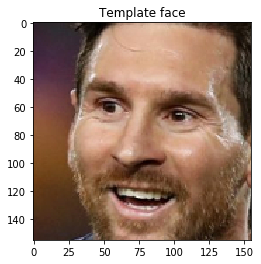

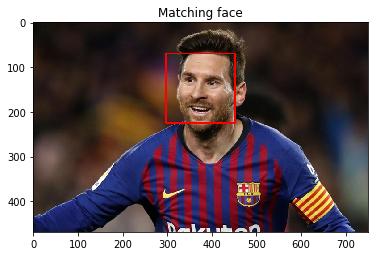

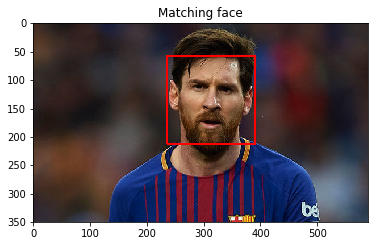

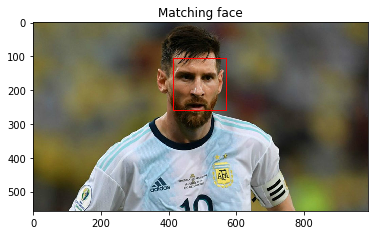

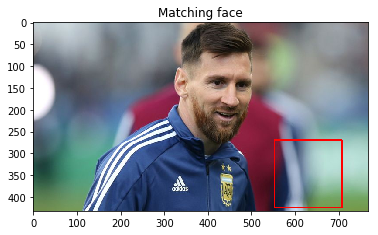

Detected Face: 1
face location and size 247 62 138 138


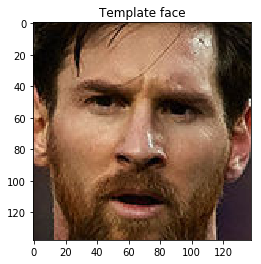

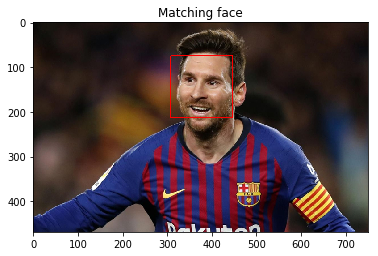

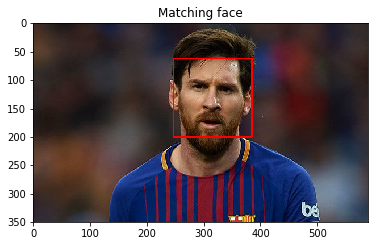

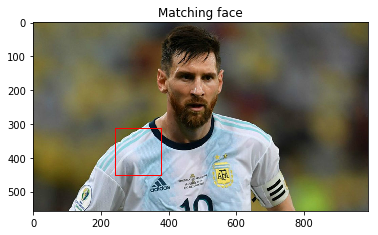

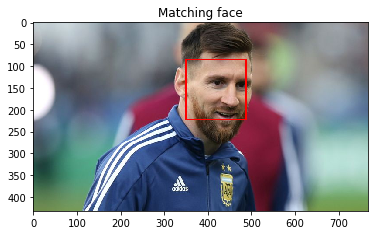

Detected Face: 1
face location and size 386 89 193 193


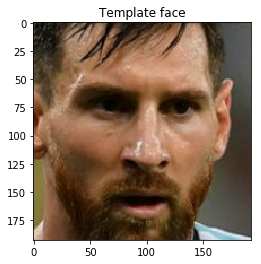

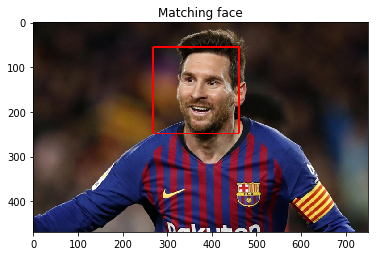

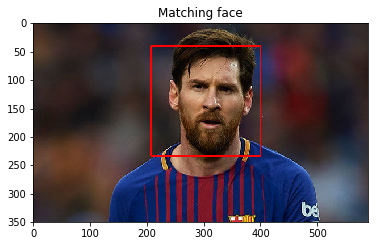

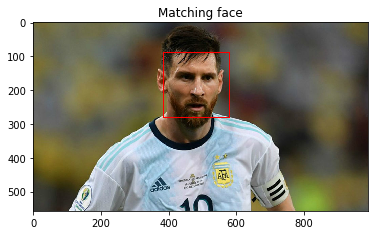

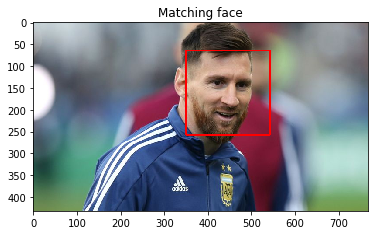

Detected Face: 1
face location and size 363 75 176 176


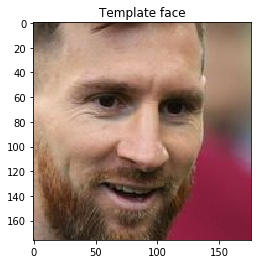

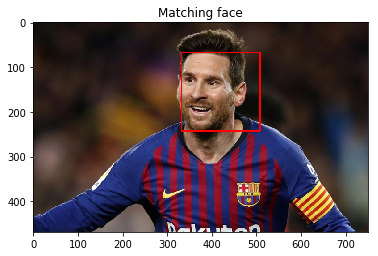

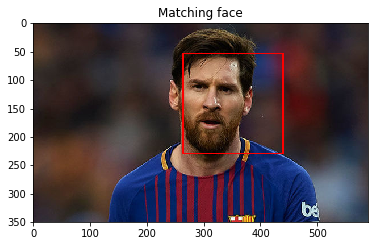

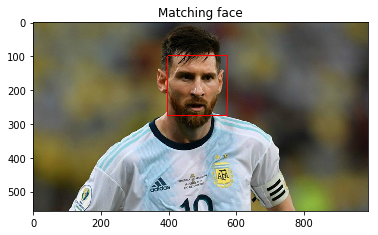

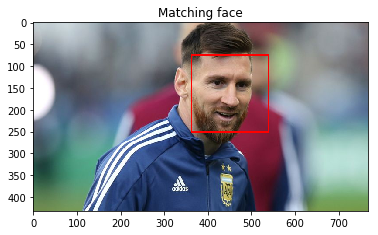

In [0]:
for fi in files:
  gray_img = return_image(fi, color_img=False)  
  x,y,w,h = face_detection_haarcascade(gray_img)
  img = return_image(fi, color_img=True)
  template_img = img[y:y+h, x:x+w]
  plt.title('Template face')
  plt.imshow(template_img)
  plt.show()
  
  for f in files:
    image = return_image(f, color_img=True) 
    match_image = face_template_matching(image, template_img)

    plt.title('Matching face')
    plt.imshow(match_image)
    plt.show()